# VGG16

In [21]:
from keras.applications.vgg16 import VGG16
model=VGG16()

In [22]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

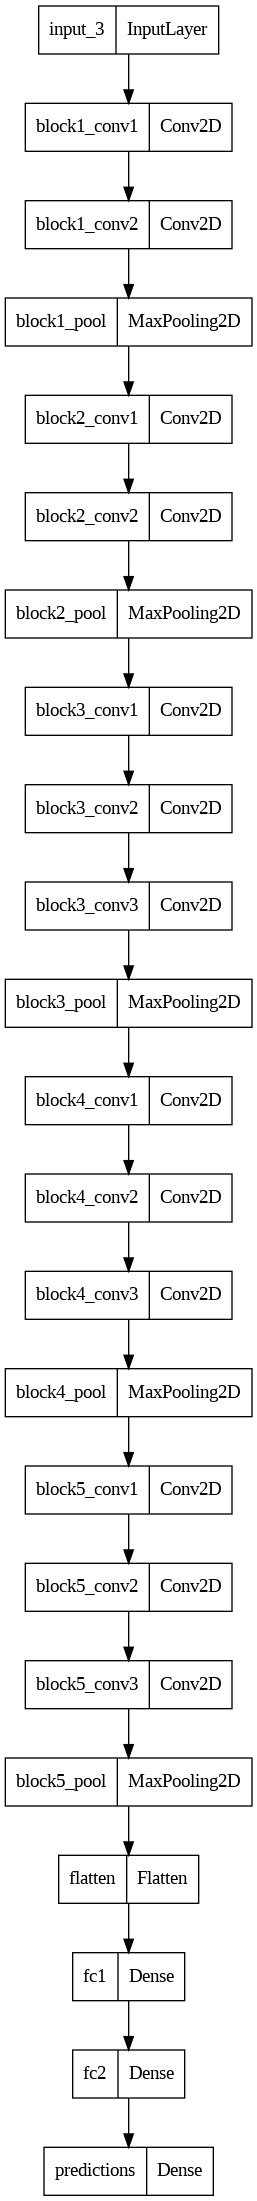

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='vgg.png')

In [24]:
# from keras.preprocessing.image import load_img
# #load an image from file
# image = load_img('test1.jpg', target_size =(224,224))

In [25]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image
from google.colab import files
#load an image from file
uploaded = files.upload()
# image = load_img('uploaded', target_size =(224,224))
for fn in uploaded.keys():
  path='/content/' + fn       #Save the image to content folder
  image=image.load_img(path, target_size=(224, 224))    #load the image

Saving pexels-pixabay-70083.jpg to pexels-pixabay-70083.jpg


In [26]:
from keras.preprocessing.image import img_to_array
#convert the image pixels to numpy array
image = img_to_array(image)

In [27]:
#reshape data from the model
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])

In [28]:
from keras.applications.vgg16 import preprocess_input
#prepare the image from the VGG model
image = preprocess_input(image)

In [29]:
#predict the probility across all output class
yhat = model.predict(image)

1/1 [==============================] - 0s 481ms/step


In [30]:
from keras.applications.vgg16 import decode_predictions
#connect the probabilities to class labels
label = decode_predictions(yhat)
#retrieve the most likely result, e.g hihest probility
label = label[0][0]
#predict the classification
print('%s(%.2f%%)'%(label[1],label[2]*100))

tree_frog(97.23%)
